In [29]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfTransformer,CountVectorizer,TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB,ComplementNB
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from time import time
from sklearn.feature_selection import SelectFromModel
from sklearn.dummy import DummyClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn_pandas import DataFrameMapper



import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score,confusion_matrix
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve


In [30]:
train_data = pd.read_csv('WikiLarge_Train.csv')
test_data = pd.read_csv('WikiLarge_Test.csv')
# sample_submission = pd.read_csv('sampleSubmission.csv')

In [31]:
aoa_aggregated_train=pd.read_csv("AoA_countfeatures_traindata.csv").fillna(0)
aoa_aggregated_test=pd.read_csv("AoA_countfeatures_testdata.csv").fillna(0)
print(aoa_aggregated_train.shape)
print(aoa_aggregated_test.shape,"\n---------------\n")


aoa_numerical_train=pd.read_csv("aoa_features_traindata.csv").fillna(0)
aoa_numerical_test=pd.read_csv("aoa_features_testdata.csv").fillna(0)
print(aoa_numerical_train.shape)
print(aoa_numerical_test.shape,"\n---------------\n")



numerical_train=pd.read_csv("only_numeric_features_traindata.csv").fillna(0)
numerical_test=pd.read_csv("only_numeric_features_testdata.csv").fillna(0)
print(numerical_train.shape)
print(numerical_test.shape,"\n---------------\n")

pos_tag_train=pd.read_csv("pos_tag_traindata.csv").fillna(0)
pos_tag_test=pd.read_csv("pos_tag_testdata.csv").fillna(0)
print(pos_tag_train.shape)
print(pos_tag_test.shape,"\n---------------\n")

concreteness_aggregated_train=pd.read_csv("concreteness_features_traindata.csv").fillna(0)
concreteness_aggregated_test=pd.read_csv("concreteness_features_testdata.csv").fillna(0)
print(concreteness_aggregated_train.shape)
print(concreteness_aggregated_test.shape,"\n---------------\n")

concreteness_numerical_train=pd.read_csv("concreteness_numerical_features_traindata.csv").fillna(0)
concreteness_numerical_test=pd.read_csv("concreteness_numerical_features_testdata.csv").fillna(0)
print(concreteness_numerical_train.shape)
print(concreteness_numerical_test.shape,"\n---------------\n")


readability_train=pd.read_csv("readability_scores_included_train.csv").fillna(0).drop(['Unnamed: 0', 'original_text', 'label', 'clean_text'],axis=1)
readability_test=pd.read_csv("readability_scores_included_test.csv").fillna(0).drop(['Unnamed: 0', 'original_text', 'label', 'clean_text',"id"],axis=1)
print(readability_train.columns)


X_train_numerical = pd.concat([aoa_aggregated_train,aoa_numerical_train,numerical_train,pos_tag_train,concreteness_aggregated_train,concreteness_numerical_train,readability_train], axis=1).fillna(0)

X_test_numerical = pd.concat([aoa_aggregated_test,aoa_numerical_test,numerical_test,pos_tag_test,concreteness_aggregated_test,concreteness_numerical_test,readability_test], axis=1).fillna(0)

print(X_train_numerical.shape)

print(X_test_numerical.shape)

X_train_numerical=X_train_numerical.drop(["Unnamed: 0"],axis=1)
X_test_numerical=X_test_numerical.drop(["Unnamed: 0"],axis=1)
train_x_numerical=X_train_numerical.copy()
test_x_numerical=X_test_numerical.copy()

train_numerical_columns=X_train_numerical.columns
test_numerical_columns=X_test_numerical.columns

(416768, 11)
(119092, 11) 
---------------

(416768, 12)
(119092, 12) 
---------------

(416768, 11)
(119092, 11) 
---------------

(416768, 40)
(119092, 40) 
---------------

(416768, 8)
(119092, 8) 
---------------

(416768, 13)
(119092, 13) 
---------------

Index(['dale_chall_score', 'flesch reading ease score', 'gunning fog',
       'flesch kincaid grade level', 'coleman liau index', 'smog index',
       'automated readability index', 'linsear write formula'],
      dtype='object')
(416768, 103)
(119092, 103)


In [32]:
y_train = pd.read_csv('WikiLarge_Train.csv')["label"]
y_test= pd.read_csv('WikiLarge_Test.csv')["label"]

In [33]:
# Create correlation matrix
corr_matrix = X_train_numerical.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

X_train_numerical=X_train_numerical.drop(X_train_numerical[to_drop], axis=1)
X_test_numerical=X_test_numerical.drop(X_test_numerical[to_drop],axis=1)
train_numerical_columns=X_train_numerical.columns
test_numerical_columns=X_test_numerical.columns

In [34]:
scaler = StandardScaler()
# transform data
X_train_numerical = scaler.fit_transform(X_train_numerical)
# X_test=scaler.transform(X_test)
X_test_numerical = scaler.transform(X_test_numerical)

Tuning hyper-parameters for accuracy
Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ............................................C=0.001; total time=   1.8s
[CV] END ............................................C=0.001; total time=   1.9s
[CV] END ............................................C=0.001; total time=   2.0s
[CV] END ............................................C=0.001; total time=   2.0s
[CV] END ............................................C=0.001; total time=   2.0s
[CV] END .............................................C=0.01; total time=   2.7s
[CV] END .............................................C=0.01; total time=   2.7s
[CV] END .............................................C=0.01; total time=   2.7s
[CV] END .............................................C=0.01; total time=   2.7s
[CV] END .............................................C=0.01; total time=   2.7s
[CV] END ..............................................C=0.1; total time=   2.8s
[CV] END ...

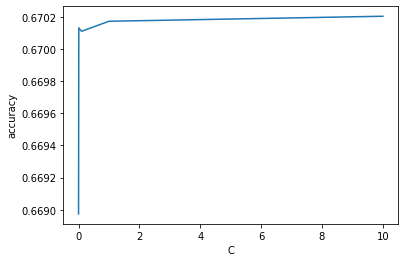

0.669 for {'C': 0.001}
0.670 for {'C': 0.01}
0.670 for {'C': 0.1}
0.670 for {'C': 1}
0.670 for {'C': 10}


In [36]:
scores = ["accuracy"]
for score in scores:
    print("Tuning hyper-parameters for %s" % score)
    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
    log_grid = GridSearchCV(LogisticRegression(), param_grid, cv=5,verbose=2,scoring=score) 
    tic = time()
    log_grid.fit(X_train_numerical, y_train)
    toc = time()
    print(f"Done in {toc - tic:.3f}s")
    print("Best parameters set found on training data:\n")
    print(log_grid.best_params_)
    print("Grid scores on training data:\n")
    means = log_grid.cv_results_['mean_test_score']
    fig, ax = plt.subplots()
    a = ax.plot([0.001, 0.01, 0.1, 1, 10],means)
    ax.set_xlabel('C')
    ax.set_ylabel(score)
    plt.show()
    for mean,params in zip(means,log_grid.cv_results_['params']):
        print("%0.3f for %r"% (mean, params))
# predictions=log_grid.best_estimator_.predict(X_test_numerical)
# list_of_tuples = list(zip(np.arange(len(predictions)),predictions))
# df = pd.DataFrame(list_of_tuples,columns = ['id', 'label']) 
# df.to_csv("baseline_submissions/Logistic_regression_numerical_features_only_tfid_vectoriser",index=False)

In [37]:
model = SelectFromModel(log_grid.best_estimator_, prefit=True)

In [38]:
train_data_best_features=model.transform(X_train_numerical)
test_data_best_features=model.transform(X_test_numerical)

In [39]:
train_numerical_columns[model.get_support()]

Index(['words_less5_phonemes', 'perc_known_less_20', 'aoa_kup', 'aoa_kup_lem',
       'perc_known', 'perc_known_lem', 'lexical_diversity', '3_syllable_count',
       'noun_common', 'noun_common_plural', 'verb_past', 'pronoun_personal',
       'flesch reading ease score', 'flesch kincaid grade level',
       'coleman liau index', 'automated readability index',
       'linsear write formula'],
      dtype='object')

## Selecting the best features from the logistic regression model

In [35]:
train_data = pd.read_csv('WikiLarge_Train.csv')
test_data = pd.read_csv('WikiLarge_Test.csv')

X_train_numerical=train_x_numerical[['words_less5_phonemes', 'perc_known_less_20', 'aoa_kup', 'aoa_kup_lem',
       'perc_known', 'perc_known_lem', 'lexical_diversity', '3_syllable_count',
       'noun_common', 'noun_common_plural', 'verb_past', 'pronoun_personal',
       'flesch reading ease score', 'flesch kincaid grade level',
       'coleman liau index', 'automated readability index',
       'linsear write formula']]
X_test_numerical=test_x_numerical[['words_less5_phonemes', 'perc_known_less_20', 'aoa_kup', 'aoa_kup_lem',
       'perc_known', 'perc_known_lem', 'lexical_diversity', '3_syllable_count',
       'noun_common', 'noun_common_plural', 'verb_past', 'pronoun_personal',
       'flesch reading ease score', 'flesch kincaid grade level',
       'coleman liau index', 'automated readability index',
       'linsear write formula']]
scaler = StandardScaler()
# transform data
X_train_numerical = pd.DataFrame(scaler.fit_transform(X_train_numerical))
# X_test=scaler.transform(X_test)
X_test_numerical = pd.DataFrame(scaler.transform(X_test_numerical))


In [38]:
test_data.columns

Index(['id', 'original_text', 'label'], dtype='object')

## Combining the features

In [39]:
#from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

train_data = pd.concat([train_data,X_train_numerical], axis=1).fillna(0)

test_data = pd.concat([test_data,X_test_numerical], axis=1).fillna(0)
# Set X and y
train_data = train_data.drop(['label'],axis=1)

test_data=test_data.drop(['label','id'],axis=1)

# initialise model and vectorizers
vectorizer1 = TfidfVectorizer()
# construct the column transfomer
column_transformer = ColumnTransformer([('tfidf1', vectorizer1,'original_text')],remainder='passthrough')

# fit the model
pipe = Pipeline([('tfidf', column_transformer)])
pipe.fit(train_data,y_train)

Pipeline(steps=[('tfidf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tfidf1', TfidfVectorizer(),
                                                  'original_text')]))])

In [40]:
train_data.shape

(416768, 18)

In [41]:
test_data.shape

(119092, 18)

In [42]:
X_train=pipe.transform(train_data)
X_test=pipe.transform(test_data)

In [43]:
X_train.shape

(416768, 142358)

# Dummy classifier 

Tuning hyper-parameters for accuracy
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .............................strategy=most_frequent; total time=   0.2s
[CV] END .............................strategy=most_frequent; total time=   0.0s
[CV] END .............................strategy=most_frequent; total time=   0.0s
[CV] END .............................strategy=most_frequent; total time=   0.0s
[CV] END .............................strategy=most_frequent; total time=   0.0s
[CV] END ................................strategy=stratified; total time=   0.0s
[CV] END ................................strategy=stratified; total time=   0.0s
[CV] END ................................strategy=stratified; total time=   0.0s
[CV] END ................................strategy=stratified; total time=   0.0s
[CV] END ................................strategy=stratified; total time=   0.0s
[CV] END ...................................strategy=uniform; total time=   0.0s
[CV] END ...

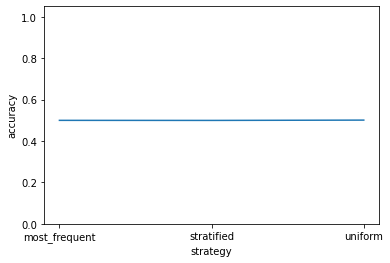

0.500 for {'strategy': 'most_frequent'}
0.500 for {'strategy': 'stratified'}
0.501 for {'strategy': 'uniform'}
nan for {'strategy': 'constant'}

 For the model with the best accuracy


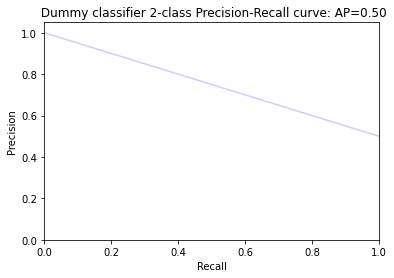

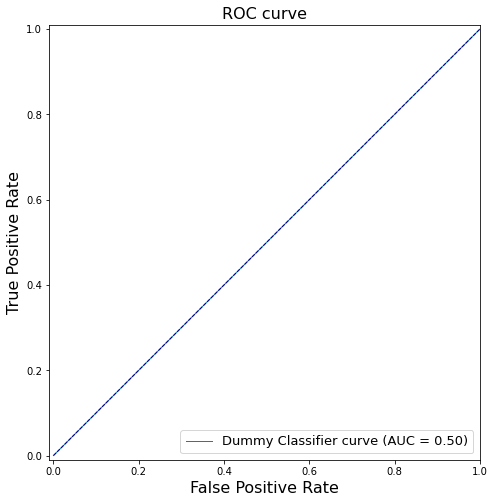

In [20]:
from sklearn.dummy import DummyClassifier
strategies = ['most_frequent', 'stratified', 'uniform', 'constant']
score = 'accuracy'
print("Tuning hyper-parameters for %s" % score)
param_grid = {"strategy":['most_frequent', 'stratified', 'uniform', 'constant']}
dummy_grid = GridSearchCV(DummyClassifier(), param_grid, cv=5,verbose=2,scoring=score) 
tic = time()
dummy_grid.fit(X_train, y_train)
toc = time()
dummy_time=toc - tic
print(f"Done in {toc - tic:.3f}s")
print("Best parameters set found on training data:\n")
print(dummy_grid.best_params_)
means = dummy_grid.cv_results_['mean_test_score']
fig, ax = plt.subplots()
a = ax.plot(['most_frequent', 'stratified', 'uniform', 'constant'],means)
ax.set_xlabel('strategy')
ax.set_ylabel(score)
ax.set_ylim([0.0, 1.05])
plt.show()
for mean,params in zip(means,dummy_grid.cv_results_['params']):
    print("%0.3f for %r"% (mean, params))
y_score = dummy_grid.best_estimator_.predict_proba(X_train)[:,-1]
precision, recall, _ = precision_recall_curve(y_train, y_score)
average_precision = average_precision_score(y_train, y_score)
print("\n For the model with the best "+ score)
plt.plot(recall, precision, color='b', alpha=0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(' Dummy classifier 2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
fpr, tpr, _ = roc_curve(y_train, y_score)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=1, label='{} curve (AUC = {:0.2f})'.format('Dummy Classifier',roc_auc))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

Tuning hyper-parameters for recall
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .............................strategy=most_frequent; total time=   0.1s
[CV] END .............................strategy=most_frequent; total time=   0.0s
[CV] END .............................strategy=most_frequent; total time=   0.0s
[CV] END .............................strategy=most_frequent; total time=   0.0s
[CV] END .............................strategy=most_frequent; total time=   0.0s
[CV] END ................................strategy=stratified; total time=   0.0s
[CV] END ................................strategy=stratified; total time=   0.0s
[CV] END ................................strategy=stratified; total time=   0.0s
[CV] END ................................strategy=stratified; total time=   0.0s
[CV] END ................................strategy=stratified; total time=   0.0s
[CV] END ...................................strategy=uniform; total time=   0.0s
[CV] END .....

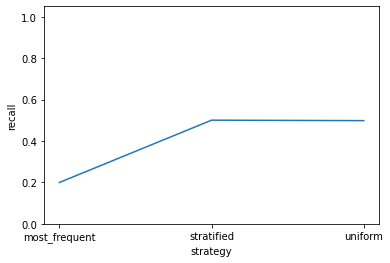

0.200 for {'strategy': 'most_frequent'}
0.501 for {'strategy': 'stratified'}
0.499 for {'strategy': 'uniform'}
nan for {'strategy': 'constant'}

 For the model with the best recall


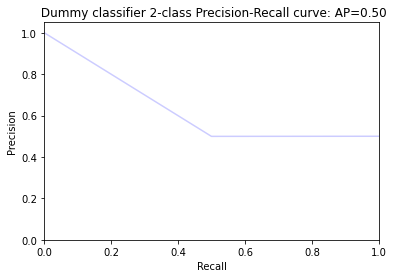

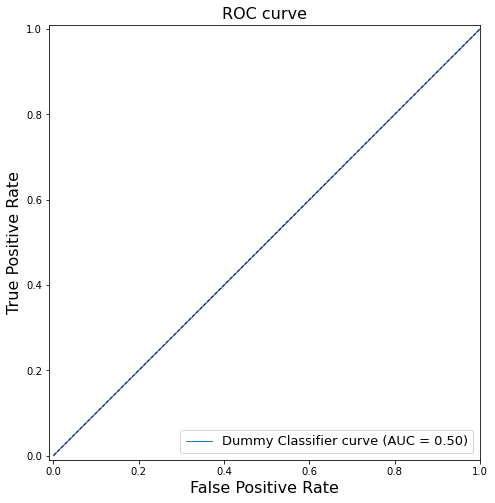

In [21]:
from sklearn.dummy import DummyClassifier
strategies = ['most_frequent', 'stratified', 'uniform', 'constant']
score = 'recall'
print("Tuning hyper-parameters for %s" % score)
param_grid = {"strategy":['most_frequent', 'stratified', 'uniform', 'constant']}
dummy_grid = GridSearchCV(DummyClassifier(), param_grid, cv=5,verbose=2,scoring=score) 
tic = time()
dummy_grid.fit(X_train, y_train)
toc = time()
dummy_time=toc - tic
print(f"Done in {toc - tic:.3f}s")
print("Best parameters set found on training data:\n")
print(dummy_grid.best_params_)
means = dummy_grid.cv_results_['mean_test_score']
fig, ax = plt.subplots()
a = ax.plot(['most_frequent', 'stratified', 'uniform', 'constant'],means)
ax.set_xlabel('strategy')
ax.set_ylabel(score)
ax.set_ylim([0.0, 1.05])
plt.show()
for mean,params in zip(means,dummy_grid.cv_results_['params']):
    print("%0.3f for %r"% (mean, params))
y_score = dummy_grid.best_estimator_.predict_proba(X_train)[:,-1]
precision, recall, _ = precision_recall_curve(y_train, y_score)
average_precision = average_precision_score(y_train, y_score)
print("\n For the model with the best "+ score)
plt.plot(recall, precision, color='b', alpha=0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(' Dummy classifier 2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
fpr, tpr, _ = roc_curve(y_train, y_score)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=1, label='{} curve (AUC = {:0.2f})'.format('Dummy Classifier',roc_auc))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

# Logistic regression

Tuning hyper-parameters for recall
Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ............................................C=0.001; total time=   3.1s
[CV] END ............................................C=0.001; total time=   3.0s
[CV] END ............................................C=0.001; total time=   2.9s
[CV] END ............................................C=0.001; total time=   3.2s
[CV] END ............................................C=0.001; total time=   3.1s
[CV] END .............................................C=0.01; total time=   5.8s
[CV] END .............................................C=0.01; total time=   6.1s
[CV] END .............................................C=0.01; total time=   5.9s
[CV] END .............................................C=0.01; total time=   5.9s
[CV] END .............................................C=0.01; total time=   5.8s
[CV] END ..............................................C=0.1; total time=   5.8s
[CV] END .....

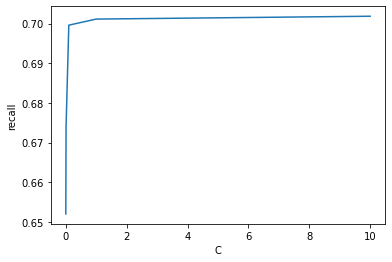

0.652 for {'C': 0.001}
0.674 for {'C': 0.01}
0.700 for {'C': 0.1}
0.701 for {'C': 1}
0.702 for {'C': 10}

 For the model with the best recall


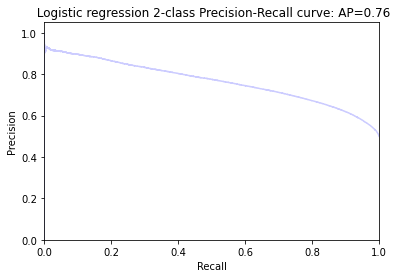

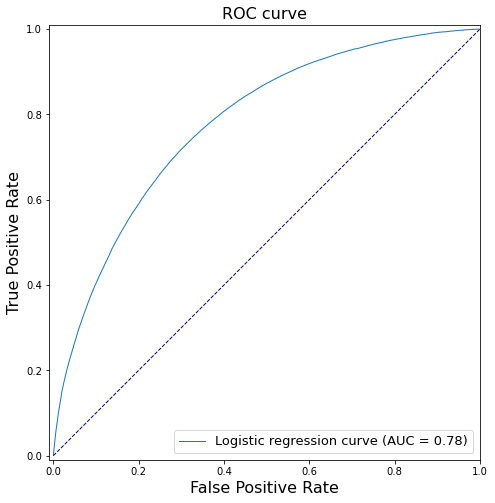

In [22]:
score = 'recall'
print("Tuning hyper-parameters for %s" % score)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
log_grid = GridSearchCV(LogisticRegression(), param_grid, cv=5,verbose=2,scoring=score) 
tic = time()
log_grid.fit(X_train, y_train)
toc = time()
log_time=toc - tic
print(f"Done in {toc - tic:.3f}s")
print("Best parameters set found on training data:\n")
print(log_grid.best_params_)
means = log_grid.cv_results_['mean_test_score']
fig, ax = plt.subplots()
a = ax.plot([0.001, 0.01, 0.1, 1, 10],means)
ax.set_xlabel('C')
ax.set_ylabel(score)
plt.show()
for mean,params in zip(means,log_grid.cv_results_['params']):
    print("%0.3f for %r"% (mean, params))
y_score = log_grid.best_estimator_.predict_proba(X_train)[:,-1]
precision, recall, _ = precision_recall_curve(y_train, y_score)
average_precision = average_precision_score(y_train, y_score)
print("\n For the model with the best "+ score)
plt.plot(recall, precision, color='b', alpha=0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(' Logistic regression 2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
fpr, tpr, _ = roc_curve(y_train, y_score)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=1, label='{} curve (AUC = {:0.2f})'.format('Logistic regression',roc_auc))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()
# mglearn.tools.visualize_coefficients(log_grid.best_estimator_.coef_,feature_names, n_top_features=30)
# predictions=log_grid.best_estimator_.predict(X_test)
# list_of_tuples = list(zip(np.arange(len(predictions)),predictions))
# df = pd.DataFrame(list_of_tuples,columns = ['id', 'label']) 
# df.to_csv("baseline_submissions/Logistic_regression_numerical_features_only_tfid_vectoriser",index=False)

Tuning hyper-parameters for accuracy
Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ............................................C=0.001; total time=   3.4s
[CV] END ............................................C=0.001; total time=   3.0s
[CV] END ............................................C=0.001; total time=   2.9s
[CV] END ............................................C=0.001; total time=   3.3s
[CV] END ............................................C=0.001; total time=   3.1s
[CV] END .............................................C=0.01; total time=   5.9s
[CV] END .............................................C=0.01; total time=   6.2s
[CV] END .............................................C=0.01; total time=   5.9s
[CV] END .............................................C=0.01; total time=   5.9s
[CV] END .............................................C=0.01; total time=   5.7s
[CV] END ..............................................C=0.1; total time=   5.9s
[CV] END ...

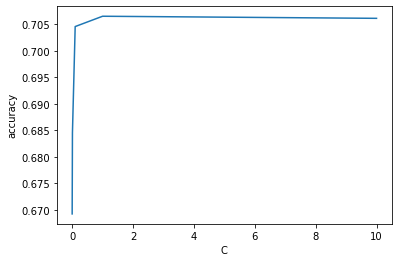

0.669 for {'C': 0.001}
0.685 for {'C': 0.01}
0.705 for {'C': 0.1}
0.706 for {'C': 1}
0.706 for {'C': 10}

 For the model with the best accuracy


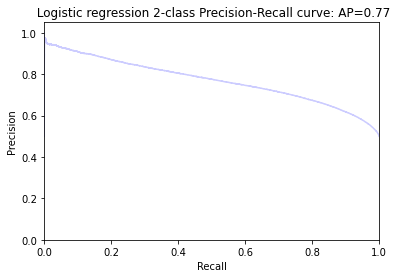

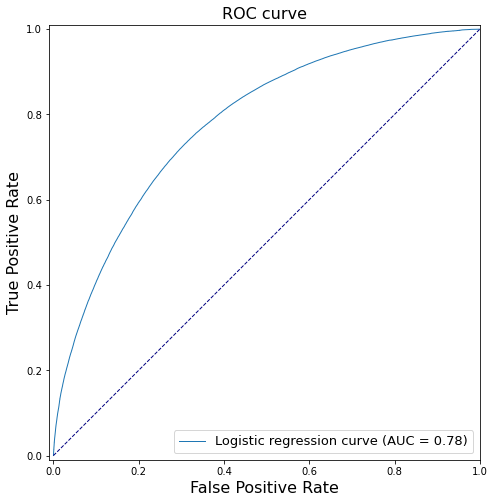

In [23]:
score = 'accuracy'
print("Tuning hyper-parameters for %s" % score)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
log_grid = GridSearchCV(LogisticRegression(), param_grid, cv=5,verbose=2,scoring=score) 
tic = time()
log_grid.fit(X_train, y_train)
toc = time()
log_time=toc - tic
print(f"Done in {toc - tic:.3f}s")
print("Best parameters set found on training data:\n")
print(log_grid.best_params_)
means = log_grid.cv_results_['mean_test_score']
fig, ax = plt.subplots()
a = ax.plot([0.001, 0.01, 0.1, 1, 10],means)
ax.set_xlabel('C')
ax.set_ylabel(score)
plt.show()
for mean,params in zip(means,log_grid.cv_results_['params']):
    print("%0.3f for %r"% (mean, params))
y_score = log_grid.best_estimator_.predict_proba(X_train)[:,-1]
precision, recall, _ = precision_recall_curve(y_train, y_score)
average_precision = average_precision_score(y_train, y_score)
print("\n For the model with the best "+ score)
plt.plot(recall, precision, color='b', alpha=0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(' Logistic regression 2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
fpr, tpr, _ = roc_curve(y_train, y_score)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=1, label='{} curve (AUC = {:0.2f})'.format('Logistic regression',roc_auc))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()
# mglearn.tools.visualize_coefficients(log_grid.best_estimator_.coef_,feature_names, n_top_features=30)
# predictions=log_grid.best_estimator_.predict(X_test)
# list_of_tuples = list(zip(np.arange(len(predictions)),predictions))
# df = pd.DataFrame(list_of_tuples,columns = ['id', 'label']) 
# df.to_csv("baseline_submissions/text_features_only_tfid_vectoriser",index=False)

# Random forest classifier

Tuning hyper-parameters for recall
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ...max_depth=2, min_samples_split=2, n_estimators=5; total time=   0.7s
[CV] END ...max_depth=2, min_samples_split=2, n_estimators=5; total time=   0.6s
[CV] END ...max_depth=2, min_samples_split=2, n_estimators=5; total time=   0.7s
[CV] END ...max_depth=2, min_samples_split=2, n_estimators=5; total time=   0.7s
[CV] END ...max_depth=2, min_samples_split=2, n_estimators=5; total time=   0.6s
[CV] END ..max_depth=2, min_samples_split=2, n_estimators=10; total time=   1.1s
[CV] END ..max_depth=2, min_samples_split=2, n_estimators=10; total time=   1.1s
[CV] END ..max_depth=2, min_samples_split=2, n_estimators=10; total time=   1.1s
[CV] END ..max_depth=2, min_samples_split=2, n_estimators=10; total time=   1.1s
[CV] END ..max_depth=2, min_samples_split=2, n_estimators=10; total time=   1.1s
[CV] END ..max_depth=2, min_samples_split=2, n_estimators=20; total time=   2.2s
[CV] END ..m

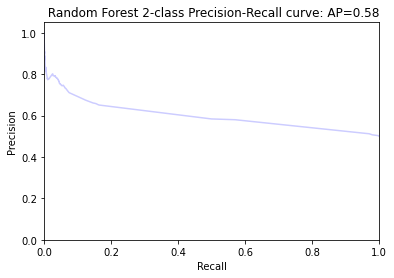

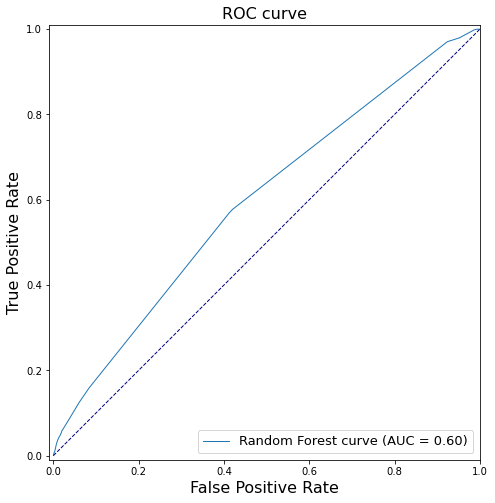

In [24]:
score ='recall'
print("Tuning hyper-parameters for %s" % score)
param_grid = {'max_depth': [2,3,5],'min_samples_split': [2,5,10],"n_estimators":[5,10,20]}
tic = time()
rf_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5,verbose=2,scoring=score) 
rf_grid.fit(X_train, y_train)
toc = time()
rf_time=toc-tic
print(f"Done in {toc - tic:.3f}s")
print("Best parameters set found on training data:\n")
print(rf_grid.best_params_)
means = rf_grid.cv_results_['mean_test_score']
for mean,params in zip(means,rf_grid.cv_results_['params']):
    print("%0.3f for %r"% (mean, params))
y_score = rf_grid.best_estimator_.predict_proba(X_train)[:,-1]
precision, recall, _ = precision_recall_curve(y_train, y_score)
average_precision = average_precision_score(y_train, y_score)
print("\n For the model with the best "+ score)
plt.plot(recall, precision, color='b', alpha=0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(' Random Forest 2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
fpr, tpr, _ = roc_curve(y_train, y_score)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=1, label='{} curve (AUC = {:0.2f})'.format('Random Forest',roc_auc))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()
print("\n")
# predictions=rf_grid.best_estimator_.predict(X_test)
# list_of_tuples = list(zip(np.arange(len(predictions)),predictions))
# df = pd.DataFrame(list_of_tuples,columns = ['id', 'label']) 
# df.to_csv("baseline_submissions/RandomForestClassifier_numerical_features_only_tfid_vectoriser",index=False)
# pd.Series(rf_grid.best_estimator_.feature_importances_, index=feature_names).nlargest(20).plot(kind='barh')



Tuning hyper-parameters for accuracy
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ...max_depth=2, min_samples_split=2, n_estimators=5; total time=   0.6s
[CV] END ...max_depth=2, min_samples_split=2, n_estimators=5; total time=   0.7s
[CV] END ...max_depth=2, min_samples_split=2, n_estimators=5; total time=   0.6s
[CV] END ...max_depth=2, min_samples_split=2, n_estimators=5; total time=   0.6s
[CV] END ...max_depth=2, min_samples_split=2, n_estimators=5; total time=   0.6s
[CV] END ..max_depth=2, min_samples_split=2, n_estimators=10; total time=   1.1s
[CV] END ..max_depth=2, min_samples_split=2, n_estimators=10; total time=   1.1s
[CV] END ..max_depth=2, min_samples_split=2, n_estimators=10; total time=   1.1s
[CV] END ..max_depth=2, min_samples_split=2, n_estimators=10; total time=   1.1s
[CV] END ..max_depth=2, min_samples_split=2, n_estimators=10; total time=   1.1s
[CV] END ..max_depth=2, min_samples_split=2, n_estimators=20; total time=   2.1s
[CV] END .

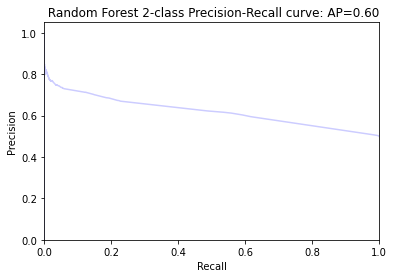

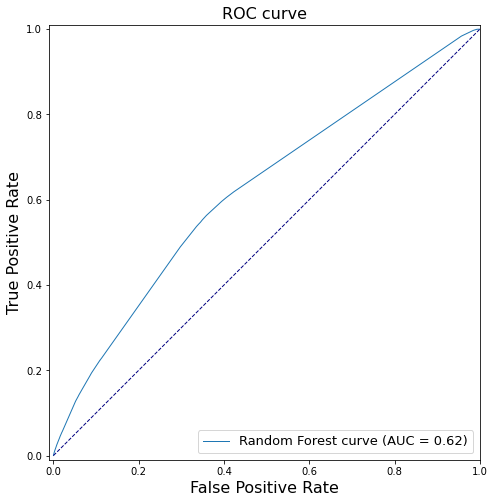

In [25]:
score ='accuracy'
print("Tuning hyper-parameters for %s" % score)
param_grid = {'max_depth': [2,3,5],'min_samples_split': [2,5,10],"n_estimators":[5,10,20]}
tic = time()
rf_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5,verbose=2,scoring=score) 
rf_grid.fit(X_train, y_train)
toc = time()
rf_time=toc-tic
print(f"Done in {toc - tic:.3f}s")
print("Best parameters set found on training data:\n")
print(rf_grid.best_params_)
means = rf_grid.cv_results_['mean_test_score']
for mean,params in zip(means,rf_grid.cv_results_['params']):
    print("%0.3f for %r"% (mean, params))
y_score = rf_grid.best_estimator_.predict_proba(X_train)[:,-1]
precision, recall, _ = precision_recall_curve(y_train, y_score)
average_precision = average_precision_score(y_train, y_score)
print("\n For the model with the best "+ score)
plt.plot(recall, precision, color='b', alpha=0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(' Random Forest 2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
fpr, tpr, _ = roc_curve(y_train, y_score)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=1, label='{} curve (AUC = {:0.2f})'.format('Random Forest',roc_auc))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()
print("\n")

# pd.Series(rf_grid.best_estimator_.feature_importances_, index=feature_names).nlargest(20).plot(kind='barh')
# predictions=rf_grid.best_estimator_.predict(X_test)
# list_of_tuples = list(zip(np.arange(len(predictions)),predictions))
# df = pd.DataFrame(list_of_tuples,columns = ['id', 'label']) 
# df.to_csv("baseline_submissions/RandomForestClassifier_numerical_features_only_tfid_vectoriser",index=False)

## SVM

Tuning hyper-parameters for accuracy
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ........................................C=0.001; total time=   4.0s
[CV 2/5] END ........................................C=0.001; total time=   3.8s
[CV 3/5] END ........................................C=0.001; total time=   3.8s
[CV 4/5] END ........................................C=0.001; total time=   3.9s
[CV 5/5] END ........................................C=0.001; total time=   4.1s
[CV 1/5] END .........................................C=0.01; total time=   9.8s
[CV 2/5] END .........................................C=0.01; total time=   8.7s
[CV 3/5] END .........................................C=0.01; total time=  10.1s
[CV 4/5] END .........................................C=0.01; total time=   9.9s
[CV 5/5] END .........................................C=0.01; total time=   9.2s
[CV 1/5] END ..........................................C=0.1; total time=  21.4s
[CV 2/5] END

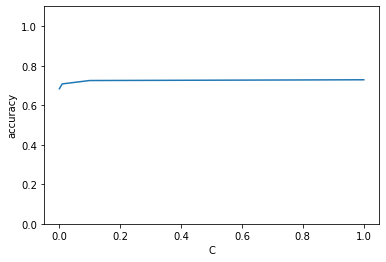

0.683 for {'C': 0.001}
0.708 for {'C': 0.01}
0.725 for {'C': 0.1}
0.729 for {'C': 1}

 For the model with the best accuracy


In [44]:
from sklearn.svm import SVC,LinearSVC
score = "accuracy"

print("Tuning hyper-parameters for %s" % score)
param_grid = {'C': [0.001,0.01,0.1,1]}
tic = time()
svm_grid = GridSearchCV(LinearSVC(penalty="l2",dual=False), param_grid, refit = True, verbose = 3,scoring=score)
# fitting the model for grid search
svm_grid.fit(X_train, y_train)
toc = time()
svm_time=toc-tic
print(f"Done in {toc - tic:.3f}s")
print("Best parameters set found on training data:\n")
print(svm_grid.best_params_)
means = svm_grid.cv_results_['mean_test_score']
fig, ax = plt.subplots()
a = ax.plot([0.001,0.01,0.1,1],means)
ax.set_xlabel('C')
ax.set_ylabel(score)
ax.set_ylim([0,1.1])
plt.show()
for mean,params in zip(means,svm_grid.cv_results_['params']):
    print("%0.3f for %r"% (mean, params))
print("\n For the model with the best "+ score)
# mglearn.tools.visualize_coefficients(svm_grid.best_estimator_.coef_,feature_names, n_top_features=40)
# pd.Series(rf_grid.best_estimator_.feature_importances_, index=feature_names).nlargest(20).plot(kind='barh')
predictions=svm_grid.best_estimator_.predict(X_test)
list_of_tuples = list(zip(np.arange(len(predictions)),predictions))
df = pd.DataFrame(list_of_tuples,columns = ['id', 'label']) 
df.to_csv("baseline_submissions/SVM COMBINED Text+Numerical important",index=False)

Tuning hyper-parameters for recall
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ........................................C=0.001; total time=   3.3s
[CV 2/5] END ........................................C=0.001; total time=   3.3s
[CV 3/5] END ........................................C=0.001; total time=   3.5s
[CV 4/5] END ........................................C=0.001; total time=   3.5s
[CV 5/5] END ........................................C=0.001; total time=   3.2s
[CV 1/5] END .........................................C=0.01; total time=   8.0s
[CV 2/5] END .........................................C=0.01; total time=   6.9s
[CV 3/5] END .........................................C=0.01; total time=   7.8s
[CV 4/5] END .........................................C=0.01; total time=   7.9s
[CV 5/5] END .........................................C=0.01; total time=   7.4s
[CV 1/5] END ..........................................C=0.1; total time=  17.3s
[CV 2/5] END .

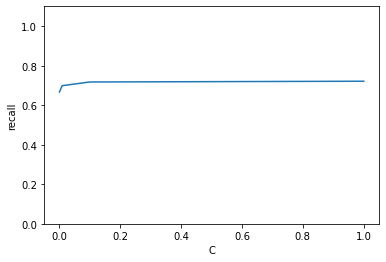

0.667 for {'C': 0.001}
0.699 for {'C': 0.01}
0.717 for {'C': 0.1}
0.721 for {'C': 1}

 For the model with the best recall


In [28]:
from sklearn.svm import SVC,LinearSVC
score ='recall'
print("Tuning hyper-parameters for %s" % score)
param_grid = {'C': [0.001,0.01,0.1,1]}
tic = time()
svm_grid = GridSearchCV(LinearSVC(penalty="l2",dual=False), param_grid, refit = True, verbose = 3,scoring=score)
# fitting the model for grid search
svm_grid.fit(X_train, y_train)
toc = time()
svm_time=toc-tic
print(f"Done in {toc - tic:.3f}s")
print("Best parameters set found on training data:\n")
print(svm_grid.best_params_)
means = svm_grid.cv_results_['mean_test_score']
fig, ax = plt.subplots()
a = ax.plot([0.001,0.01,0.1,1],means)
ax.set_xlabel('C')
ax.set_ylabel(score)
ax.set_ylim([0,1.1])
plt.show()
for mean,params in zip(means,svm_grid.cv_results_['params']):
    print("%0.3f for %r"% (mean, params))
print("\n For the model with the best "+ score)
# mglearn.tools.visualize_coefficients(svm_grid.best_estimator_.coef_,feature_names, n_top_features=40)